In [1]:
#Building a simple linear regression model with Scikit-learn
#Loading a sample dataset
import pandas as pd
stud_scores = pd.read_csv("C:\\Users\\divya\\Desktop\\score.csv")
stud_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [2]:
stud_scores.shape

(25, 2)

In [3]:
#From the info() method, we can see that both Hours and Scores are numeric, which is crucial for linear regression
stud_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
#The describe() method will give a statistical overview of the data
stud_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#check for null values
stud_scores.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#check for correlation 
stud_scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: >

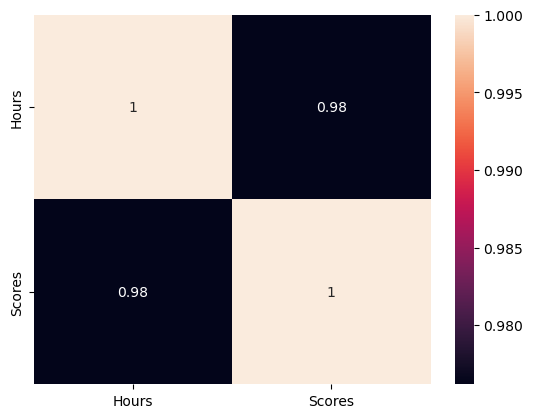

In [7]:
#plotting correlation heat map 
import seaborn as sns
sns.heatmap(stud_scores.corr(), annot=True)

C:\Users\divya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


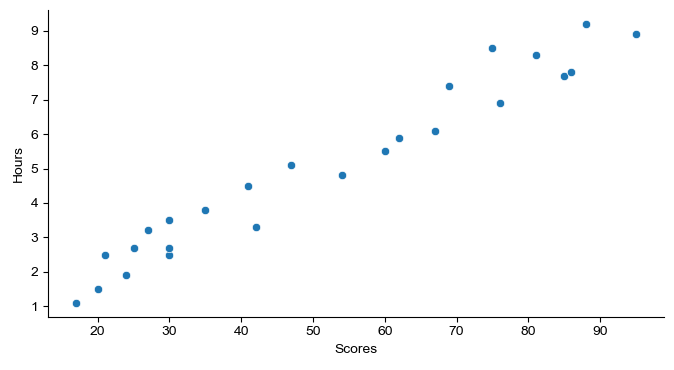

In [8]:
#plotting a scatter plot
import seaborn as sns

sns.relplot(x='Scores', y='Hours', data=stud_scores, 
            height=3.8, aspect=1.8, kind='scatter')
sns.set_style('dark')

In [9]:
#Splitting the data
#Create the feature matrix(X) and the response vector(y)
X = stud_scores.iloc[:,:-1].values # feature matrix
y = stud_scores.iloc[:,1].values # response vector

In [10]:
# SPLITTING THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


In [11]:
#Fitting simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#Getting the coefficient/slope and the intercept
regressor.coef_


array([10.41075981])

In [12]:
#intercept
regressor.intercept_


-1.5123061161277889

<Axes: xlabel='Hours', ylabel='Scores'>

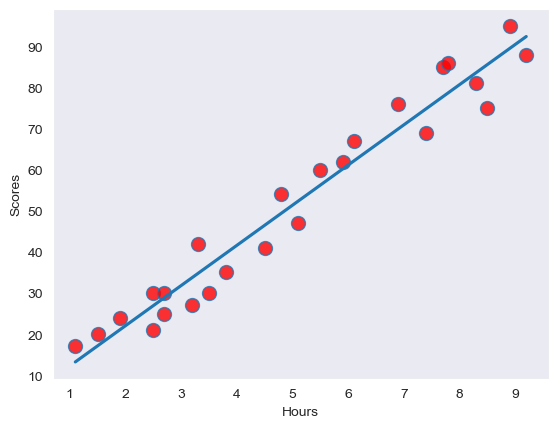

In [13]:
#Linear regression model fit line
sns.regplot(x='Hours', y='Scores', data=stud_scores, ci=None, scatter_kws={'s':100, 'facecolor':'red'})

In [14]:
#Predicting test set result
y_pred = regressor.predict(X_test)
y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [15]:
#Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df

,Actual,Predicted
0,17,9.939530
1,42,32.843201
2,24,18.268138
3,75,86.979152
4,54,48.459341
5,85,78.650544
6,67,61.993329
7,69,75.527316


In [16]:
#Checking the residuals:
residuals = y_test - y_pred
residuals

array([  7.06047032,   9.15679874,   5.73186248, -11.97915227,
         5.54065903,   6.34945558,   5.00667127,  -6.52731648])

Text(0, 0.5, 'Predictions')

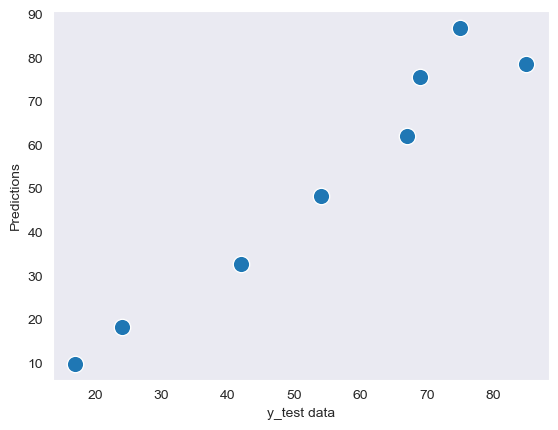

In [17]:
#Comparing the test data and the predicted values with a scatter plot
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y = y_pred,  s=140)
plt.xlabel('y_test data')
plt.ylabel('Predictions')

In [18]:
#Evaluating linear regression models
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test,y_pred))

MAE: 7.169048271425507


In [19]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 56.092330905646705


In [20]:
#Root Mean Squared Error(RMSE)
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 7.489481350911204


In [21]:
#From the sklearn.metrics module, import the r2_score function and find the goodness of fit of the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8933827573294114


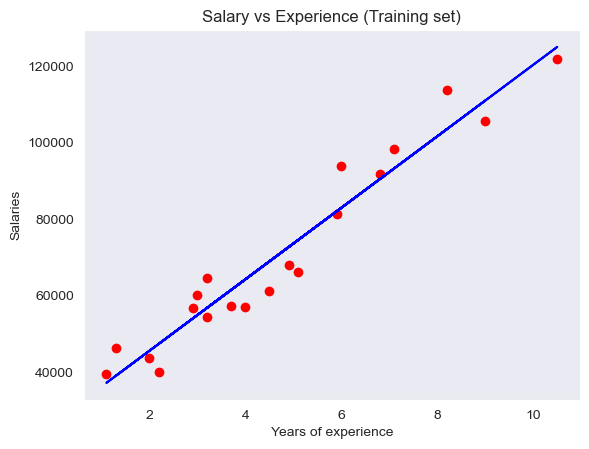

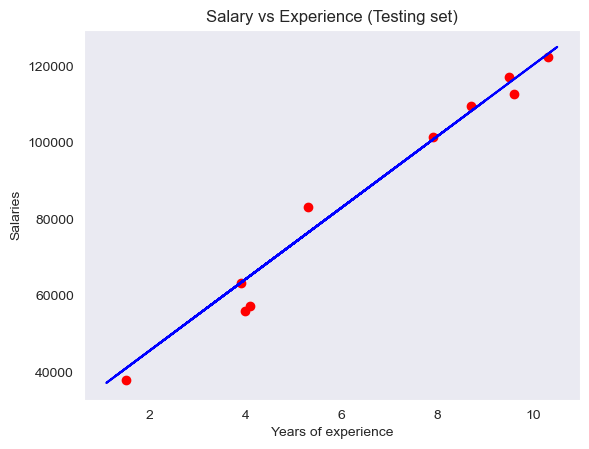

In [22]:
# importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
dataset = pd.read_csv("C:\\Users\\divya\\Desktop\\Salary_Data.csv")
dataset.head()
 
# data preprocessing
X = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector
 
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
 
# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
 
# predicting the test set results
y_pred = regressor.predict(X_test) 
y_pred
 
y_test
 
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph
  
plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph
 
#plot for the TEST
  
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")
  
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 